#**Data Cleaning, Preprocessing and Summary statistics and Visualizations**




In [9]:
import pandas as pd
df = pd.read_csv('coffee_health.csv')
df

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,50,Female,Japan,2.1,199.8,6.0,Fair,30.5,50,Medium,10.1,Moderate,Healthcare,0,1
9996,9997,18,Female,UK,3.4,319.2,5.8,Fair,19.1,71,Medium,11.6,Mild,Service,0,0
9997,9998,26,Male,China,1.6,153.4,7.1,Good,25.1,66,Low,13.7,NaN,Student,1,1
9998,9999,40,Female,Finland,3.4,327.1,7.0,Good,19.3,80,Low,0.1,NaN,Student,0,0


##Checking for null values


In [10]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Country,0
Coffee_Intake,0
Caffeine_mg,0
Sleep_Hours,0
Sleep_Quality,0
BMI,0
Heart_Rate,0


##Replacing Null values with Mean in Health Issues column




In [11]:
df['Health_Issues'].fillna(df['Health_Issues'].mode()[0], inplace=True)
df.head()

/tmp/ipython-input-357722939.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Health_Issues'].fillna(df['Health_Issues'].mode()[0], inplace=True)


,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,Mild,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,Mild,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


##Descriptive Statistics

In [12]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


##A Descriptive Pivot table

In [13]:
pivot = df.pivot_table(index=['Country'],
                       values=['Age', 'Smoking', 'BMI', 'Heart_Rate', 'Coffee_Intake'],
                       aggfunc=['mean', 'max', 'min', 'count','sum', 'std'])
print(pivot)

                  mean                                               max  \
                   Age        BMI Coffee_Intake Heart_Rate   Smoking Age   
Country                                                                    
Australia    35.434608  24.049698      2.544266  70.205231  0.195171  64   
Belgium      34.835010  24.233602      2.411670  70.818913  0.173038  67   
Brazil       35.188596  24.008991      2.547588  71.162281  0.182018  70   
Canada       35.068140  24.169797      2.497606  70.869245  0.174954  77   
China        35.214971  23.885029      2.574664  70.234165  0.209213  70   
Finland      34.690196  23.814706      2.477843  71.319608  0.188235  75   
France       35.342685  24.011623      2.528457  69.899800  0.214429  68   
Germany      35.042254  23.584708      2.466398  71.209256  0.187123  70   
India        34.685115  24.187214      2.503435  70.372137  0.221374  80   
Italy        34.732809  23.760904      2.441257  70.420432  0.223969  72   
Japan       

##Visualization Using Plotly and Matplotlib

In [14]:
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

###Gender-Based Visualization on the Influence of Coffee to their Health Issues and Stress levels

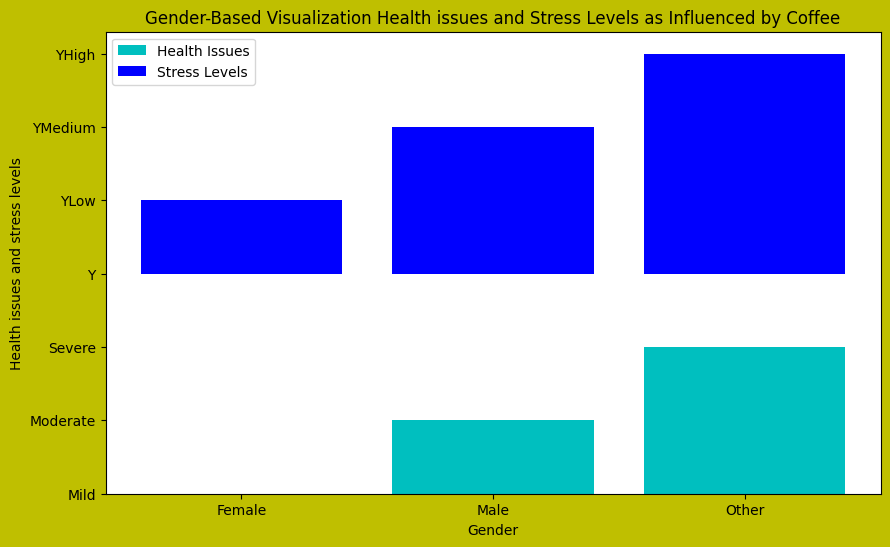

In [15]:
plt.figure(figsize=(10, 6), facecolor='y')
X = df['Gender'].value_counts().index
Y = df['Health_Issues'].value_counts().index
Y1= df['Stress_Level'].value_counts().index
plt.bar(X, Y, label='Health Issues', color='c')
plt.bar(X, Y1, bottom= 'Y', label='Stress Levels', color='b')
plt.legend()
plt.xlabel('Gender')
plt.ylabel('Health issues and stress levels')
plt.title('Gender-Based Visualization Health issues and Stress Levels as Influenced by Coffee')
plt.show()

### Visualization of Coffee Intake Across Different Countries

In [18]:
fig = px.area(df,
             x='Country',
             y='Coffee_Intake',
             title='Average Coffee Intake Across Different Countries and it\'s Influence on stress levels',
             color='Stress_Level',
             )
fig.show()

###Visualizing Physical Active Hours vs Sleeping Hours

In [19]:
fig = px.bar(df, x="Country",
             y=["Physical_Activity_Hours", "Sleep_Hours"],
             title='Physical Activity vs Sleep Hours Among Different Countries'
             )
fig.update_traces(opacity=1.0)
fig.update_layout(
    yaxis=dict(
        tickformat=".0f"
    )
)

fig.show()

#**PREDICTIVE MODELLING**

##Importing all necessary Libraries

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE

##Feature Selection

In [21]:
X = df[['Coffee_Intake','Caffeine_mg','Sleep_Hours', 'Sleep_Quality', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours', 'Smoking']]
Y = df['Alcohol_Consumption']

In [22]:
(df==0).sum()

,0
ID,0
Age,0
Gender,0
Country,0
Coffee_Intake,558
Caffeine_mg,528
Sleep_Hours,0
Sleep_Quality,0
BMI,0
Heart_Rate,0


##Train the Model

In [28]:
cols_with_zeros = [['Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate','Physical_Activity_Hours', 'Smoking']]
for col in cols_with_zeros:
    df[col] = df[col].replace(0, df[col].median())

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, Y_train)

# Step 3: Scale features
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Step 4: Train model
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

LogisticRegression()

##Make Predictions

In [29]:
sample_data = [[5.0,400.0]] # Example data

# Convert sample data to a pandas DataFrame using original column names
sample_df = pd.DataFrame(sample_data, columns=X.columns)

# Apply the same scaling as used for the training data
sample_scaled = scaler.transform(sample_df)

# Make predictions on the scaled sample data
sample_predictions = model.predict(sample_scaled)

# Print the predictions
print("Predictions for sample data:", sample_predictions)

Predictions for sample data: [1]


In [30]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.482
